# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset yang digunakan dalam eksperimen ini adalah **Telco Customer Churn** yang diperoleh dari Kaggle. Dataset ini berisi informasi tentang pelanggan perusahaan telekomunikasi fiktif, termasuk layanan yang mereka gunakan, informasi akun, demografi, dan status apakah mereka berhenti berlangganan (Churn) atau tidak.
   
   **Tujuan:** Memprediksi apakah pelanggan akan melakukan Churn berdasarkan fitur yang tersedia..


# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

# **3. Memuat Dataset**

In [2]:
# Memuat data dari folder data_raw
df = pd.read_csv('data_raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


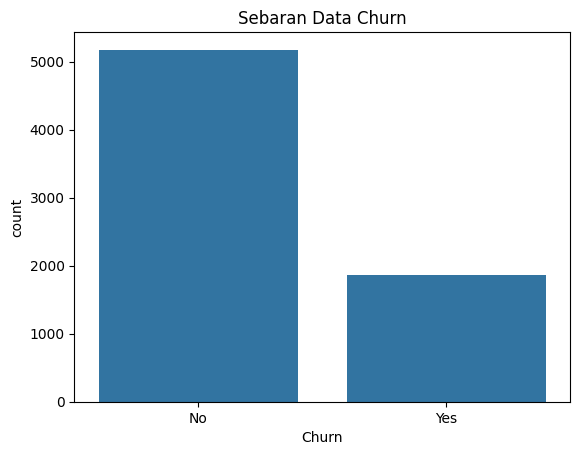

In [5]:
# Cek tipe data
df.info()

# Masalah umum di dataset ini: TotalCharges bertipe object karena ada spasi kosong " "
# Ubah jadi numeric, yang error jadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Isi NaN dengan 0 (asumsi pelanggan baru belum bayar)
df['TotalCharges'] = df['TotalCharges'].fillna(0)


# Cek sebaran target
sns.countplot(x='Churn', data=df)
plt.title('Sebaran Data Churn')
plt.show()

# **5. Data Preprocessing**

In [5]:
# 1. Hapus kolom yang tidak berguna untuk training
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# 2. Encoding Kategorikal
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("Data setelah encoding:")
print(df.head())

# 3. Simpan data bersih
import os
os.makedirs('preprocessing', exist_ok=True)
df.to_csv('preprocessing/churn_data_clean.csv', index=False)
print("\nData bersih berhasil disimpan ke folder preprocessing!")

Data setelah encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         